<a href="https://colab.research.google.com/github/Rodrich272/IDEAP/blob/main/Ejercicios/Convolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage import io, color, exposure
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = io.imread('/content/drive/MyDrive/IA/perfil.jpg')

In [3]:
img.shape

(364, 248, 3)

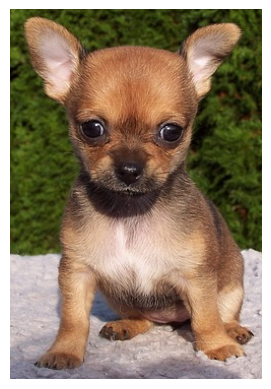

In [4]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
img = color.rgb2gray(img)

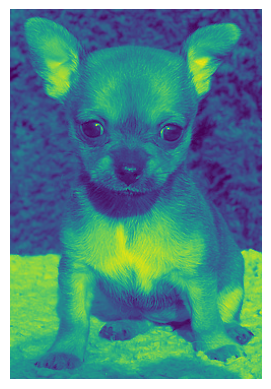

In [6]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
img.shape

(364, 248)

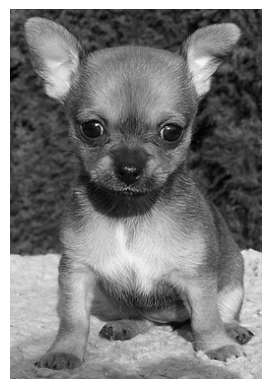

In [8]:
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [9]:
def convolved2d(image, kernel):
  kernel = np.flipud(np.fliplr(kernel))
  output = np.zeros_like(image)
  image_padded = np.zeros((image.shape[0] + 2, image.shape[1]+2))
  image_padded[1:-1, 1:-1] = image
  for x in range(image.shape[1]):
    for y in range(image.shape[0]):
      output[y,x]=(kernel*image_padded[y:y + 3,x:x + 3]).sum()
  return output

In [10]:
sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
outline = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
top_sobel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

In [11]:
img_sharpen = convolved2d(img, sharpen)
img_outline = convolved2d(img, outline)
img_top_sobel = convolved2d(img, top_sobel)

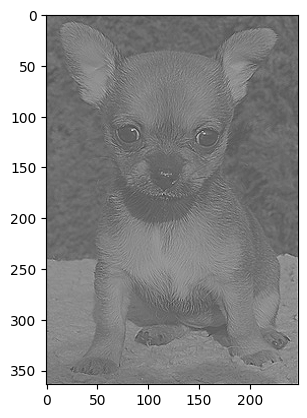

In [12]:
plt.imshow(img_sharpen, cmap = plt.cm.gray)

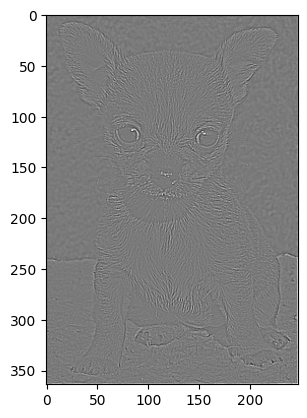

In [13]:
plt.imshow(img_outline, cmap = plt.cm.gray)

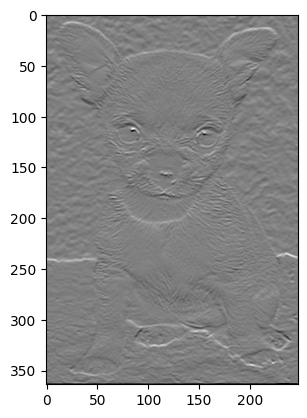

In [14]:
plt.imshow(img_top_sobel, cmap = plt.cm.gray)

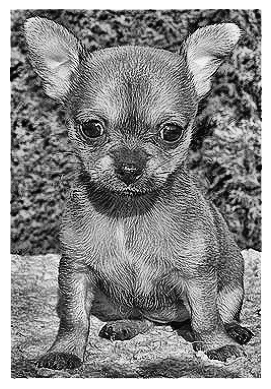

In [15]:
image_sharpen_equalized = exposure.equalize_adapthist(img_sharpen/np.max(np.abs(img_sharpen)), clip_limit=0.03)
plt.imshow(image_sharpen_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

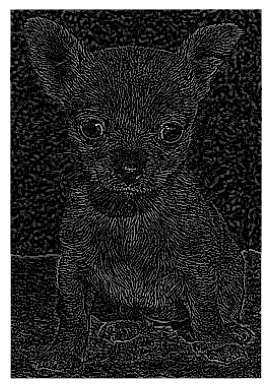

In [16]:
image_outline_equalized = exposure.equalize_adapthist(img_outline/np.max(np.abs(img_outline)), clip_limit=0.03)
plt.imshow(image_outline_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

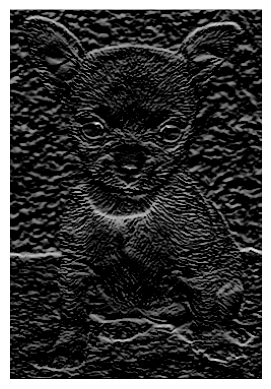

In [17]:
image_top_sobel_equalized = exposure.equalize_adapthist(img_top_sobel/np.max(np.abs(img_top_sobel)), clip_limit=0.03)
plt.imshow(image_top_sobel_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()